# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Use ! in front of the code if you are running terminal commands
#!pip install seaborn
#!pip freeze 
#!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [4]:
#Just to check the cities in the list
print(cities)

['qaanaaq', 'hobart', 'qasigiannguit', 'amalapuram', 'carnarvon', 'kodiak', 'katsuura', 'mataura', 'iqaluit', 'ponta delgada', 'albany', 'byron bay', 'bredasdorp', 'estrela', 'evensk', 'busselton', 'clearwater', 'ust-kut', 'lebu', 'severo-kurilsk', 'skelleftea', 'punta arenas', 'saint george', 'gornopravdinsk', 'farsala', 'talnakh', 'ushuaia', 'hilo', 'tasiilaq', 'yar-sale', 'chuy', 'tarkwa', 'bonthe', 'tela', 'khatanga', 'avera', 'terrace', 'krasnoselkup', 'kapaa', 'atuona', 'butaritari', 'saskylakh', 'marabba', 'waipawa', 'coronado', 'hobyo', 'adrar', 'mananjary', 'ullapool', 'yellowknife', 'hecun', 'mikuni', 'linqiong', 'likhoslavl', 'lavrentiya', 'taolanaro', 'svetlyy', 'meulaboh', 'lagoa', 'ribeira grande', 'tuatapere', 'tuktoyaktuk', 'ashqelon', 'barentsburg', 'lorengau', 'new norfolk', 'thompson', 'arraial do cabo', 'aksarka', 'codrington', 'ucluelet', 'remedios', 'karauzyak', 'mizdah', 'osmena', 'ponta do sol', 'los llanos de aridane', 'grand river south east', 'cookshire', 'ca

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
#Openweather API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
#The open weather API requires units as a parameter
unit_parameter = "imperial"

# Build partial query URL and use sample city to test
query_url_test = f"{url}appid={weather_api_key}&units={unit_parameter}&q=Knoxville"
#Commented out the display (query_url) after testing because display revealed the keys in the url
#display (query_url_test)

In [6]:
#Partial QUery from Test Section Above
query_url= f"{url}appid={weather_api_key}&units={unit_parameter}&q="
#Commented out the display (query_url) after testing because display revealed the keys in the url
#display (query_url)

In [7]:
#Creating an empty dataframe
df = pd.DataFrame(columns=['country', 'city', 'lat', 'lon', 'date', 'cloudiness', 'humidity', 'max_temp', 'wind_speed'])

display(df)

,country,city,lat,lon,date,cloudiness,humidity,max_temp,wind_speed


In [8]:
#Building the query
#I knew the query would would generate the correct results after the testing above using Knoxville.
query_url= f"{url}appid={weather_api_key}&units={unit_parameter}&q="

In [9]:
count = 1

for city in cities:
    if count % 50 == 0:
        time.sleep(60)
    try:
        print(f'Retrieving data for city {city}')
        #Get values for current city
        city_info = requests.get(query_url + city).json()
        country = city_info['sys']['country']
        date = city_info['dt']
        lat = city_info['coord']['lat']
        lon = city_info['coord']['lon']
        clouds = city_info['clouds']['all']
        humidity = city_info['main']['humidity']
        max_temp = city_info['main']['temp_max']
        wind_speed = city_info['wind']['speed']
        
        #Create a dictionary
        current_city_dict = {
            'country': country,
            'city': city,
            'lat': lat,
            'lon': lon,
            'date': date,
            'cloudiness': clouds,
            'humidity': humidity,
            'max_temp': max_temp,
            'wind_speed': wind_speed
        }
        
        #Convert dictionary to dataframe for current city
        current_city = pd.DataFrame([current_city_dict])
        
        #Concatenate main df with current city dataframe
        df = pd.concat([df, current_city]).reset_index(drop=True)
        
    except:
        print(f'Data for city {city} is not available')
    
    count+=1

Retrieving data for city qaanaaq
Retrieving data for city hobart
Retrieving data for city qasigiannguit
Retrieving data for city amalapuram
Retrieving data for city carnarvon
Retrieving data for city kodiak
Retrieving data for city katsuura
Retrieving data for city mataura
Retrieving data for city iqaluit
Retrieving data for city ponta delgada
Retrieving data for city albany
Retrieving data for city byron bay
Retrieving data for city bredasdorp
Retrieving data for city estrela
Retrieving data for city evensk
Retrieving data for city busselton
Retrieving data for city clearwater
Retrieving data for city ust-kut
Retrieving data for city lebu
Retrieving data for city severo-kurilsk
Retrieving data for city skelleftea
Retrieving data for city punta arenas
Retrieving data for city saint george
Retrieving data for city gornopravdinsk
Retrieving data for city farsala
Retrieving data for city talnakh
Retrieving data for city ushuaia
Retrieving data for city hilo
Retrieving data for city tasiil

Retrieving data for city dongsheng
Retrieving data for city kyle of lochalsh
Data for city kyle of lochalsh is not available
Retrieving data for city provideniya
Retrieving data for city norsup
Retrieving data for city port elizabeth
Retrieving data for city ostrovnoy
Retrieving data for city owo
Retrieving data for city georgetown
Retrieving data for city lillooet
Retrieving data for city graaff-reinet
Retrieving data for city chara
Retrieving data for city kushima
Retrieving data for city aasiaat
Retrieving data for city pasni
Retrieving data for city chino valley
Retrieving data for city pemagatsel
Retrieving data for city letenye
Retrieving data for city kazalinsk
Data for city kazalinsk is not available
Retrieving data for city boca do acre
Retrieving data for city torbay
Retrieving data for city honiara
Retrieving data for city pozo colorado
Retrieving data for city shimoda
Retrieving data for city half moon bay
Retrieving data for city chermoz
Retrieving data for city muroto
Ret

Retrieving data for city tarrafal
Retrieving data for city superior
Retrieving data for city bershet
Retrieving data for city lar gerd
Data for city lar gerd is not available
Retrieving data for city verkhnyaya khava
Retrieving data for city narsaq
Retrieving data for city parana
Retrieving data for city kinkala
Retrieving data for city mecca
Retrieving data for city carlisle
Retrieving data for city alice springs
Retrieving data for city balabac
Retrieving data for city vilyuysk
Retrieving data for city vinces
Retrieving data for city chegdomyn
Retrieving data for city praia da vitoria
Retrieving data for city chinsali
Retrieving data for city altus
Retrieving data for city gbarnga
Retrieving data for city beringovskiy
Retrieving data for city olavarria
Retrieving data for city ketchenery
Data for city ketchenery is not available
Retrieving data for city novobirilyussy
Retrieving data for city fairfield
Retrieving data for city giyani
Retrieving data for city faanui
Retrieving data fo

In [10]:
display(df)

,country,city,lat,lon,date,cloudiness,humidity,max_temp,wind_speed
0,GL,qaanaaq,77.4840,-69.3632,1643498180,100,64,4.95,10.40
1,AU,hobart,-42.8794,147.3294,1643498725,75,60,72.01,3.00
2,GL,qasigiannguit,68.8193,-51.1922,1643498725,93,81,12.45,12.71
3,IN,amalapuram,16.5833,82.0167,1643498725,8,95,62.76,1.86
4,AU,carnarvon,-24.8667,113.6333,1643498726,67,88,77.07,12.66
...,...,...,...,...,...,...,...,...,...
544,JP,naze,28.3667,129.4833,1643499473,100,76,56.32,12.55
545,JP,itoman,26.1247,127.6694,1643499566,75,92,64.42,13.80
546,RU,solnechnyy,50.7214,136.6319,1643499626,78,89,-10.21,0.81
547,BD,sarankhola,22.3082,89.7897,1643499627,0,56,53.76,2.48


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#The solution approach I used moved variables into a dictionary and the dictionary into a pandaframe at each city iteration
#The concat option was used to stack the dataframes after the each cities dataframe from populated.

In [12]:
#Export df Dataframe with cities data to the output_data folder
df.to_csv('../output_data/cities_output.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_df = df[df['humidity'] > 100] 
    
print('\nResult dataframe :\n', weather_df)

#Based on the results below, none of my cities in the df (now weather_df) have humidity greater than 100.


Result dataframe :
 Empty DataFrame
Columns: [country, city, lat, lon, date, cloudiness, humidity, max_temp, wind_speed]
Index: []


In [14]:
#proving or confirming for a second time thaat the humidity > 100 data frame is blank
weather_df

,country,city,lat,lon,date,cloudiness,humidity,max_temp,wind_speed


In [15]:
#  Get the indices of cities that have humidity over 100%.
#Not applicable because none of my city data has humidity greater than 100 or 100%

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Per instructions, going to make the clean_city_data into the data frame I am using

clean_city_data_df = df

display(clean_city_data_df)


,country,city,lat,lon,date,cloudiness,humidity,max_temp,wind_speed
0,GL,qaanaaq,77.4840,-69.3632,1643498180,100,64,4.95,10.40
1,AU,hobart,-42.8794,147.3294,1643498725,75,60,72.01,3.00
2,GL,qasigiannguit,68.8193,-51.1922,1643498725,93,81,12.45,12.71
3,IN,amalapuram,16.5833,82.0167,1643498725,8,95,62.76,1.86
4,AU,carnarvon,-24.8667,113.6333,1643498726,67,88,77.07,12.66
...,...,...,...,...,...,...,...,...,...
544,JP,naze,28.3667,129.4833,1643499473,100,76,56.32,12.55
545,JP,itoman,26.1247,127.6694,1643499566,75,92,64.42,13.80
546,RU,solnechnyy,50.7214,136.6319,1643499626,78,89,-10.21,0.81
547,BD,sarankhola,22.3082,89.7897,1643499627,0,56,53.76,2.48


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

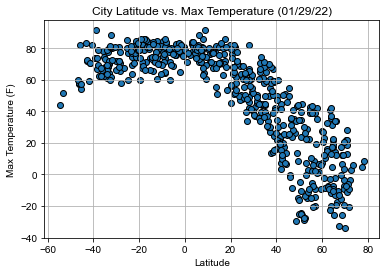

In [17]:
#temp vs latitude scatterplot, format time
plt.scatter(clean_city_data_df["lat"],
            clean_city_data_df["max_temp"],
 edgecolor="black", linewidths=1, marker="o",
 alpha=1.0, label="Cities")
# Incorporate the other graph properties

#Playing around with the time.strftime() function
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#sns is a seaborn reference - saw a youtube video and few posts about using seaborn
#Just testing it out sns.set()
sns.set(style="whitegrid")
# Save the figure
plt.savefig("../output_data/Latitude vs Temperature (F).png")

Nothern Hemisphere has a latitude of > 0 and Southern Hemisphere has a latitude < 0.  The Equator is refelcted at 0 latitude. 
The scatter plot above reflects that the closer we move from the Northern Hemisphere. the more temperatures increase.  Based on the data generated in the exercise, we are not seeing a significant or only minor change in the southern hemisphere as we move away from the equator

## Latitude vs. Humidity Plot

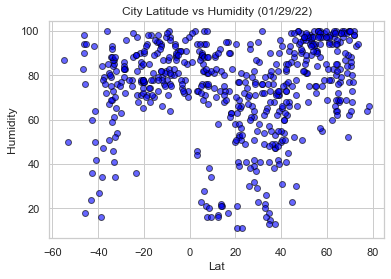

In [18]:
#latitude vs Humidity
plt.scatter(clean_city_data_df["lat"],
 clean_city_data_df ["humidity"],
 edgecolor="black", linewidths=1, marker="o",
 alpha=0.6, label="Cities",color = "blue")
# Incorporate the other graph properties

#Playing around with the time.strftime() function
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.grid(True)
sns.set(style="whitegrid")
# Save the figure
plt.savefig("../output_data/LatitudevsHumidity.png")


The "City Latitude vs Humidity" scatter plot shown above analyzes hmidity values as we move nearer and further away from the equator.  The chart clearly reflects that humidity levels have little impact based on proximity to the equator.

## Latitude vs. Cloudiness Plot

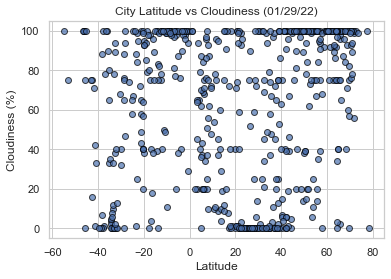

In [19]:
plt.scatter(clean_city_data_df['lat'], clean_city_data_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",
alpha=0.7, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Playing around with the time.strftime() function
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
sns.set(style="whitegrid")
plt.savefig("../output_data/Cloudiness.png")


In [ ]:
Cloud cover and geographical location have no relationship based on the "City Latitude vs Cloudiness" scatter plot above.

## Latitude vs. Wind Speed Plot

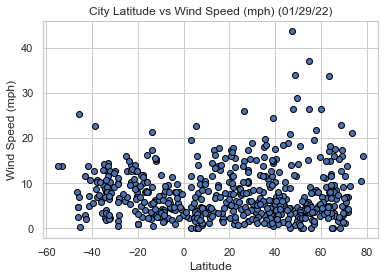

In [20]:
plt.scatter(clean_city_data_df['lat'], clean_city_data_df['wind_speed'], edgecolor="black", linewidths=1, marker="o",
alpha=1.0, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Playing around with the time.strftime() function
plt.title("City Latitude vs Wind Speed (mph) (%s)" % time.strftime("%x"))
sns.set(style="whitegrid")
plt.savefig("../output_data/WindSpeed.png")


Wind speeds and geographic location or proximity to the eaquator have no relationship based on the scatter plot shown above.

## Linear Regression

In [21]:
#Create dataframes for the nother and southern hemispheres
north_df = clean_city_data_df.loc[pd.to_numeric(clean_city_data_df["lat"]).astype(float) > 0, :]
south_df = clean_city_data_df.loc[pd.to_numeric(clean_city_data_df["lat"]).astype(float) < 0, :]


In [22]:
#Review Northern DF = north_df
north_df

,country,city,lat,lon,date,cloudiness,humidity,max_temp,wind_speed
0,GL,qaanaaq,77.4840,-69.3632,1643498180,100,64,4.95,10.40
2,GL,qasigiannguit,68.8193,-51.1922,1643498725,93,81,12.45,12.71
3,IN,amalapuram,16.5833,82.0167,1643498725,8,95,62.76,1.86
5,US,kodiak,57.7900,-152.4072,1643498726,0,55,35.11,21.85
6,JP,katsuura,35.1333,140.3000,1643498726,58,73,44.19,18.07
...,...,...,...,...,...,...,...,...,...
543,TR,izmir,38.4622,27.0923,1643499500,75,73,38.71,1.14
544,JP,naze,28.3667,129.4833,1643499473,100,76,56.32,12.55
545,JP,itoman,26.1247,127.6694,1643499566,75,92,64.42,13.80
546,RU,solnechnyy,50.7214,136.6319,1643499626,78,89,-10.21,0.81


In [23]:
#Review Southern DF = south_df
south_df

,country,city,lat,lon,date,cloudiness,humidity,max_temp,wind_speed
1,AU,hobart,-42.8794,147.3294,1643498725,75,60,72.01,3.00
4,AU,carnarvon,-24.8667,113.6333,1643498726,67,88,77.07,12.66
7,NZ,mataura,-46.1927,168.8643,1643498726,100,98,57.67,2.57
11,AU,byron bay,-28.6500,153.6167,1643498728,76,79,80.56,10.00
12,ZA,bredasdorp,-34.5322,20.0403,1643498643,4,88,66.27,2.30
...,...,...,...,...,...,...,...,...,...
534,VU,sola,-13.8833,167.5500,1643499562,83,78,82.71,21.41
535,AU,clarence town,-32.5833,151.7833,1643499562,89,52,81.34,7.27
536,PG,popondetta,-8.7537,148.2534,1643499563,99,64,85.82,2.93
541,MG,ambilobe,-13.2000,49.0500,1643499565,82,92,74.62,0.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =-1.33x + 88.83.
r-squared equals: -0.8477648198314338


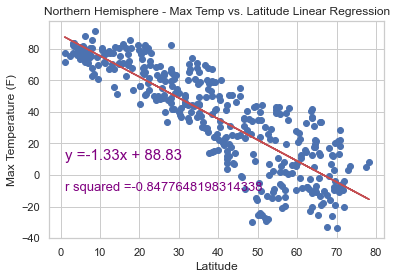

In [24]:
# using the Norhern Hemispher dataframe = north_df
#https://www.programcreek.com/python/example/84598/scipy.stats.linregress
#chart the Maximum Temp vs latitude using linear regression
x = pd.to_numeric(north_df['lat']).astype(float)
y = pd.to_numeric(north_df['max_temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

#define the line equation
#https://realpython.com/linear-regression-in-python/

#A linear regression line has an equation of the form Y = a + bX, 
#where X is the explanatory variable and Y is the dependent variable. 
#The slope of the line is b, and a is the intercept (the value of y when x = 0).

#http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

#linear regression is something with which I struggle or am challenged in Python and Pandas
#I googled and read several sites and posts.  I am just taking a leap that I am understanding it enough
#to put each of these pieces together.  I could have taken a more simple approach
#but I wanted to see if I could calc each component so that I could step through it
#and generate the actual equation for the slope and calc the r squared

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(1,10),fontsize=15,color="purple")
plt.annotate(f"r squared ={rvalue}",(1,-10),fontsize=13,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")

#Save the image
plt.savefig("../output_data/MaxTempvLinRegNH.png")
 



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =0.26x + 79.6.
r-squared equals: 0.41521938665236385


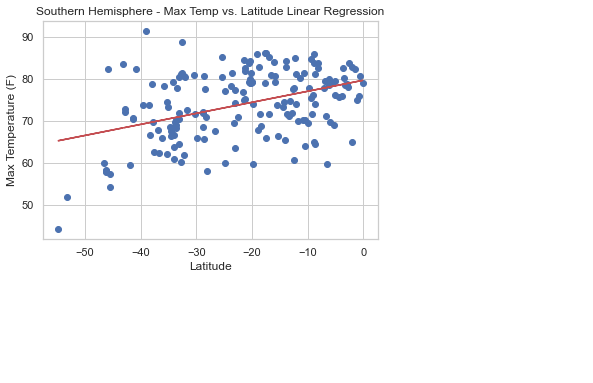

In [25]:
#NOTE:For the Southern Henmisphere, I copied the code for the northern hemisphere and changed the data frame reference
#https://www.programcreek.com/python/example/84598/scipy.stats.linregress

# using the Southern Hemispher dataframe = south_df
#chart the Maximum Temp vs latitude using linear regression
x = pd.to_numeric(south_df['lat']).astype(float)
y = pd.to_numeric(south_df['max_temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

#define the line equation
#https://realpython.com/linear-regression-in-python/

#A linear regression line has an equation of the form Y = a + bX, 
#where X is the explanatory variable and Y is the dependent variable. 
#The slope of the line is b, and a is the intercept (the value of y when x = 0).

#http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.annotate(f"r squared ={rvalue}",(4,10),fontsize=13,color="orange")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/MaxTempvLinRegSH.png")
 


In [ ]:
The above two charts comparing max temperatures for the northern and southern hemisphere shows a strong negative relationship 
between temperatures and distance relative to the equator.  The second chartt indicates a less strong postive relationsip in
tempartures in relationship to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.37x + 58.54.
r-squared equals: 0.3409152138183036


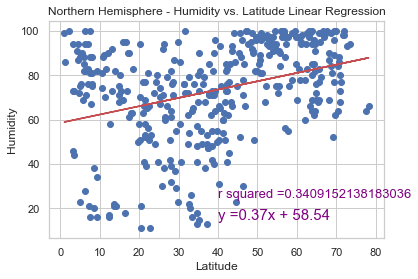

In [26]:
#Same equation written earlier for the earlier regression analysis
#https://www.programcreek.com/python/example/84598/scipy.stats.linregress
#Just need to copy and paste the original code and change the y_val to reference Humidity in the north_df

# using the Norhern Hemispher dataframe = north_df
#chart the Maximum Temp vs latitude using linear regression
x = pd.to_numeric(north_df['lat']).astype(float)
y = pd.to_numeric(north_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress= x * slope + intercept

#define the line equation

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="purple")
plt.annotate(f"r squared ={rvalue}",(40,25),fontsize=13,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/HumTempLinRegNH.png")
 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.48x + 88.45.
r-squared equals: 0.3849891337843588


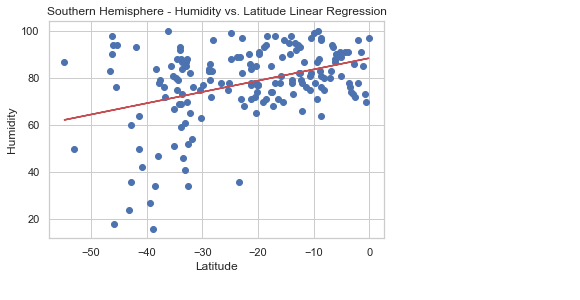

In [27]:
#NOTE:For the remaining southern hemisphere line regression 
#https://www.programcreek.com/python/example/84598/scipy.stats.linregress
# using the Southern Hemispher dataframe = south_df
#chart the Humidity vs latitude using linear regression
x = pd.to_numeric(south_df['lat']).astype(float)
y = pd.to_numeric(south_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

#define the line equation
#https://realpython.com/linear-regression-in-python/

#A linear regression line has an equation of the form Y = a + bX, 
#where X is the explanatory variable and Y is the dependent variable. 
#The slope of the line is b, and a is the intercept (the value of y when x = 0).

#http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.annotate(f"r squared ={rvalue}",(2,-10),fontsize=13,color="orange")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/HumidityvLinRegSH.png")
 

In [ ]:
Neither the northern or southern hemisphere have a strong correlation between humidity and proximity to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.65x + 32.47.
r-squared equals: 0.33681456519353187


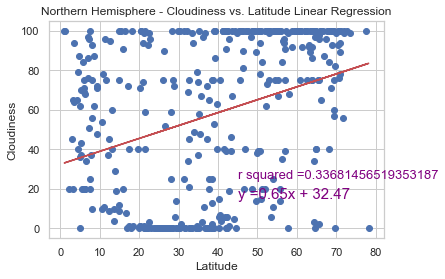

In [28]:
#Same equation written earlier for the earlier regression analysis
#Just need to copy and paste the original code and change the y_val to reference cloudiness in the north_df

# using the Norhern Hemispher dataframe = north_df
#chart the cloudiness vs latitude using linear regression
x = pd.to_numeric(north_df['lat']).astype(float)
y = pd.to_numeric(north_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

#define the line equation

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="purple")
plt.annotate(f"r squared ={rvalue}",(45,25),fontsize=13,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/CloudinessLinRegNH.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =1.14x + 90.12.
r-squared equals: 0.4006619834436868


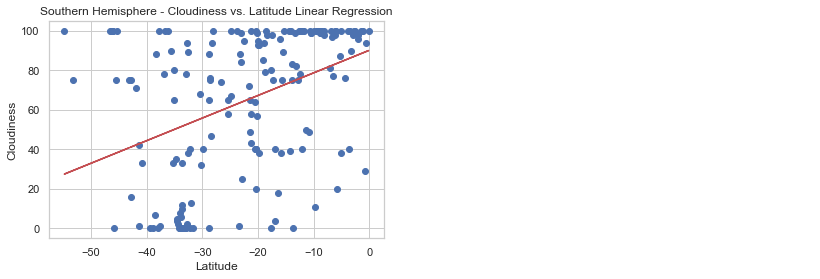

In [29]:
#Same equation written earlier for the earlier regression analysis
#Just need to copy and paste the original code and change the y_val to reference cloudiness in the south_df

# using the Norhern Hemispher dataframe = north_df
#chart the cloudiness vs latitude using linear regression
x = pd.to_numeric(south_df['lat']).astype(float)
y = pd.to_numeric(south_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

#define the line equation

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="purple")
plt.annotate(f"r squared ={rvalue}",(45,25),fontsize=13,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/CloudinessLinRegSH.png")

The line of best fit and the related scatter plots indicate that neither hemisphere has a strong correlation between the level of cloud cover and geographical proximity to the equator.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =0.02x + 6.7.
r-squared equals: 0.07582352119626623


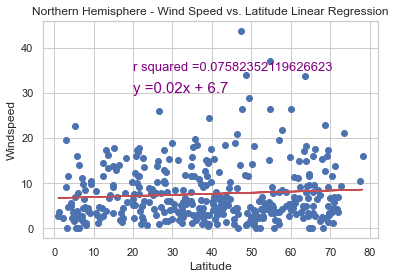

In [30]:
#Same equation written earlier for the earlier regression analysis
#Just need to copy and paste the original code and change the y_val to reference wind speed in the north_df

# using the Norhern Hemispher dataframe = north_df
#chart the Wind Speed vs latitude using linear regression
x = pd.to_numeric(north_df['lat']).astype(float)
y = pd.to_numeric(north_df['wind_speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

#define the line equation

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x,y)
plt.plot(x,regress, "r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="purple")
plt.annotate(f"r squared ={rvalue}",(20,35),fontsize=13,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/WindSpeedLinRegNH.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.08x + 5.81.
r-squared equals: -0.24360043412774326


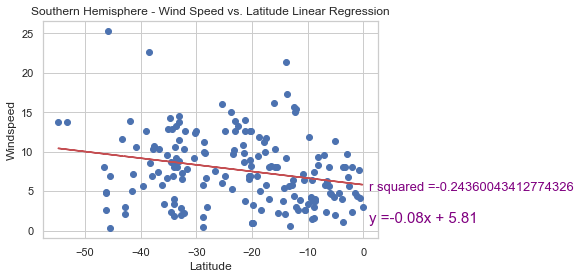

In [31]:
#Same equation written earlier for the earlier regression analysis
#Just need to copy and paste the original code and change the y_val to reference wind speed in the south_df

#https://www.programcreek.com/python/example/84598/scipy.stats.linregress

# using the Norhern Hemispher dataframe = north_df
#chart the Maximum Temp vs latitude using linear regression
x_val = pd.to_numeric(south_df['lat']).astype(float)
y_val = pd.to_numeric(south_df['wind_speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept

#define the line equation

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print the line equation and r squared
print(f"Regression line equation is: {line_eq}.")
print(f"r-squared equals: {rvalue}")


#Plot the data
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val, "r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="purple")
plt.annotate(f"r squared ={rvalue}",(1,5),fontsize=13,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

sns.set(style="whitegrid")

#Save the image
plt.savefig("../output_data/WindSpeedLinRegSH.png")

In [ ]:
The line of best fit and the related scatter plots indicate that neither hemisphere has a strong correlation 
between the wind speed and geographical proximity to the equator.  